In [ ]:
#CNN & LSTM 

In [74]:
import numpy as np 
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession


config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

C:\Users\jarwa\AppData\Roaming\Python\Python312\site-packages\tensorflow\python\client\session.py:1793: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [75]:
import matplotlib.pyplot as plt

In [77]:
train_df = pd.read_csv("mitbih_train.csv", header=None)
test_df = pd.read_csv("mitbih_test.csv", header=None)

print(train_df.shape)
print(test_df.shape)

(87554, 188)
(21892, 188)


In [78]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
print(train_df[train_df.columns[-1]].unique())
print(train_df[test_df.columns[-1]].unique())

[0. 1. 2. 3. 4.]
[0. 1. 2. 3. 4.]


In [81]:
train_x = np.array(train_df[train_df.columns[0:-1]], dtype=np.float32)
train_y = np.array(train_df[train_df.columns[-1:]], dtype=np.float32)

test_x = np.array(train_df[test_df.columns[0:-1]], dtype=np.float32)
test_y = np.array(train_df[test_df.columns[-1:]], dtype=np.float32)

In [82]:
train_x.shape, train_y.shape

((87554, 187), (87554, 1))

In [83]:
test_x.shape, test_y.shape

((87554, 187), (87554, 1))

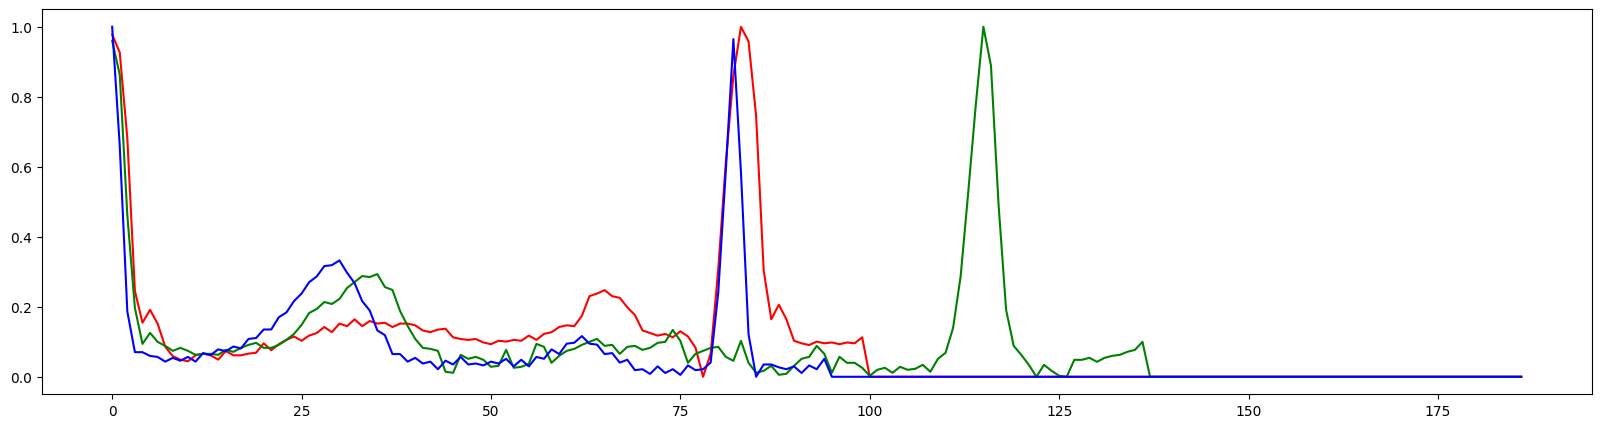

In [84]:
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(train_x[0], color="r")
ax.plot(train_x[1], color="g")
ax.plot(train_x[2], color="b")
plt.show()

In [85]:
# Return difference array
def return_diff_array_table(array, dur):
  for idx in range(array.shape[1]-dur):
    before_col = array[:,idx]
    after_col = array[:,idx+dur]
    new_col = ((after_col - before_col)+1)/2
    new_col = new_col.reshape(-1,1)
    if idx == 0:
      new_table = new_col
    else :
      new_table = np.concatenate((new_table, new_col), axis=1)
#For concat add zero padding
  padding_array = np.zeros(shape=(array.shape[0],dur))
  new_table = np.concatenate((padding_array, new_table), axis=1)
  return new_table
#Concat
def return_merge_diff_table(df, diff_dur):
  fin_table = df.reshape(-1,187,1,1)
  for dur in diff_dur:
    temp_table = return_diff_array_table(df, dur)
    fin_table = np.concatenate((fin_table, temp_table.reshape(-1,187,1,1)), axis=2)
  return fin_table

#Use "stratify" option
x_train, x_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.2, stratify=train_y)

#Add Data
x_train = return_merge_diff_table(df=x_train, diff_dur=[1])
x_val = return_merge_diff_table(df=x_val, diff_dur=[1])

print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(70043, 187, 2, 1) (70043, 1) (17511, 187, 2, 1) (17511, 1)


In [86]:
#For see a model's result
def return_result(model, x_train, x_test, y_train, y_test):
    y_pred = model.predict(x_test)
    train_pred = model.predict(x_train)
    pred_list=[]
    for x in y_pred:
        pred_list.append(np.argmax(x))
    train_pred_list=[]
    for x in train_pred:
        train_pred_list.append(np.argmax(x))
    test_mat = confusion_matrix(y_test, pred_list)
    train_mat = confusion_matrix(y_train, train_pred_list)
    print("In train")
    print(accuracy_score(y_train, train_pred_list))
    print(train_mat)
    print("In test")
    print(accuracy_score(y_test, pred_list))
    print(test_mat)

In [87]:
def return_model1():
    input_tens = tf.keras.Input(shape=(187,2,1))
    x = tf.keras.layers.Conv2D(256, kernel_size=(10,2), strides=(5,1),padding='valid')(input_tens)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(128, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(64, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(5, activation="softmax")(x)
    model = tf.keras.Model(inputs=input_tens, outputs=x)
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
    print(model.summary())
    return model

In [96]:
model1 = return_model1()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)     │ (None, 187, 2, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 36, 1, 256)     │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 36, 1, 256)     │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 36, 1, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 1, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 1, 512)     │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 1, 512)     │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 32, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 1, 512)     │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 1, 512)     │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 28, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 28, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 1, 128)     │       327,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 1, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 24, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 24, 1, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 20, 1, 64)      │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 20, 1, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 20, 1, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           32

 Total params: 2,347,525 (8.96 MB)

 Trainable params: 2,344,581 (8.94 MB)

 Non-trainable params: 2,944 (11.50 KB)

None


In [116]:
checkpoint_path_best = "./best_acc_v01.ckpt.weights.h5"
cp_callback_best = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_best,monitor="val_accuracy",save_weights_only=True,verbose=1,save_best_only=True)

model1.fit(x_train,y_train, epochs=5, batch_size=128, validation_data=(x_val,y_val),callbacks=[cp_callback_best])

Epoch 1/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.9884 - loss: 0.0393
Epoch 1: val_accuracy improved from -inf to 0.98612, saving model to ./best_acc_v01.ckpt.weights.h5
548/548 ━━━━━━━━━━━━━━━━━━━━ 186s 340ms/step - accuracy: 0.9884 - loss: 0.0393 - val_accuracy: 0.9861 - val_loss: 0.0490
Epoch 2/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.9884 - loss: 0.0368
Epoch 2: val_accuracy improved from 0.98612 to 0.98664, saving model to ./best_acc_v01.ckpt.weights.h5
548/548 ━━━━━━━━━━━━━━━━━━━━ 185s 338ms/step - accuracy: 0.9884 - loss: 0.0368 - val_accuracy: 0.9866 - val_loss: 0.0460
Epoch 3/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step - accuracy: 0.9884 - loss: 0.0365
Epoch 3: val_accuracy did not improve from 0.98664
548/548 ━━━━━━━━━━━━━━━━━━━━ 192s 350ms/step - accuracy: 0.9884 - loss: 0.0365 - val_accuracy: 0.9861 - val_loss: 0.0505
Epoch 4/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step - accuracy: 0.9887 - loss: 0.0354
Epoch 4: val_accuracy improved from

In [117]:
return_result(model1, x_train=x_train, x_test=x_val, y_train=y_train, y_test=y_val)

548/548 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 42s 19ms/step
In train
0.9917479262738603
[[57748   185    18    25     1]
 [  130  1645     3     0     0]
 [   64     5  4532    27     2]
 [   71     1    21   420     0]
 [   21     0     4     0  5120]]
In test
0.9862372223174005
[[14424    50     9     6     5]
 [   72   370     3     0     0]
 [   42     5  1102     7     2]
 [   23     0     4   101     0]
 [   10     1     2     0  1273]]


In [118]:
def return_model2():
    input_tens = tf.keras.Input(shape=(187,2,1))
    x = tf.keras.layers.Conv2D(256, kernel_size=(10,2), strides=(5,1),padding='valid')(input_tens)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Conv2D(512, kernel_size=(5,1), padding='valid')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.ReLU()(x)
    x = tf.keras.layers.Dropout(rate=0.5)(x)
    x = tf.keras.layers.Reshape((x.shape[1], x.shape[3]))(x)
    x = tf.keras.layers.LSTM(64)(x)
    x = tf.keras.layers.Dense(5, activation="softmax")(x)
    model = tf.keras.Model(inputs=input_tens, outputs=x)
    model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=["accuracy"])
    print(model.summary())
    return model

In [119]:
model2=return_model2()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_23 (InputLayer)     │ (None, 187, 2, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 36, 1, 256)     │         5,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 36, 1, 256)     │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_8 (ReLU)                  │ (None, 36, 1, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 36, 1, 256)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 1, 512)     │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 1, 512)     │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_9 (ReLU)                  │ (None, 32, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 1, 512)     │     1,311,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 28, 1, 512)     │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_10 (ReLU)                 │ (None, 28, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 28, 1, 512)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 28, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,125,637 (8.11 MB)

 Trainable params: 2,123,077 (8.10 MB)

 Non-trainable params: 2,560 (10.00 KB)

None


In [120]:
#For saving best model
checkpoint_path_best2 = "./best_acc_v02.ckpt.weights.h5"
cp_callback_best2 = tf.keras.callbacks.ModelCheckpoint(checkpoint_path_best2, monitor="val_accuracy", save_weights_only=True, verbose=1, save_best_only=True)

model2.fit(x_train,y_train, epochs=5, batch_size=128, validation_data=(x_val,y_val), callbacks=[cp_callback_best2])

Epoch 1/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.8528 - loss: 0.5008
Epoch 1: val_accuracy improved from -inf to 0.89178, saving model to ./best_acc_v02.ckpt.weights.h5
548/548 ━━━━━━━━━━━━━━━━━━━━ 177s 318ms/step - accuracy: 0.8528 - loss: 0.5006 - val_accuracy: 0.8918 - val_loss: 0.3483
Epoch 2/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step - accuracy: 0.9417 - loss: 0.2015
Epoch 2: val_accuracy improved from 0.89178 to 0.95620, saving model to ./best_acc_v02.ckpt.weights.h5
548/548 ━━━━━━━━━━━━━━━━━━━━ 184s 336ms/step - accuracy: 0.9417 - loss: 0.2014 - val_accuracy: 0.9562 - val_loss: 0.1640
Epoch 3/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.9568 - loss: 0.1553
Epoch 3: val_accuracy improved from 0.95620 to 0.96402, saving model to ./best_acc_v02.ckpt.weights.h5
548/548 ━━━━━━━━━━━━━━━━━━━━ 187s 341ms/step - accuracy: 0.9568 - loss: 0.1553 - val_accuracy: 0.9640 - val_loss: 0.1282
Epoch 4/5
548/548 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step - accuracy: 0.964

In [121]:
return_result(model2, x_train=x_train, x_test=x_val, y_train=y_train, y_test=y_val)

548/548 ━━━━━━━━━━━━━━━━━━━━ 14s 25ms/step
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 50s 23ms/step
In train
0.9731307910854761
[[57357   108   156    25   331]
 [  571  1166    34     0     7]
 [  252     2  4296    55    25]
 [  165     1    27   318     2]
 [   59     0    62     0  5024]]
In test
0.9696762035292102
[[14325    30    48    11    80]
 [  164   265    14     0     2]
 [   74     3  1059    17     5]
 [   43     0     7    78     0]
 [   16     0    17     0  1253]]


In [126]:
return_result(model1, x_train=x_train, x_test=x_val, y_train=y_train, y_test=y_val)
return_result(model2, x_train=x_train, x_test=x_val, y_train=y_train, y_test=y_val)

test_input = np.array(test_df[test_df.columns[0:-1]], dtype=np.float32)
test_target = np.array(test_df[test_df.columns[-1:]], dtype=np.float32)

test_input = return_merge_diff_table(df=test_input, diff_dur=[1])

print(test_input.shape, test_target.shape)

548/548 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step
In train
0.9917479262738603
[[57748   185    18    25     1]
 [  130  1645     3     0     0]
 [   64     5  4532    27     2]
 [   71     1    21   420     0]
 [   21     0     4     0  5120]]
In test
0.9862372223174005
[[14424    50     9     6     5]
 [   72   370     3     0     0]
 [   42     5  1102     7     2]
 [   23     0     4   101     0]
 [   10     1     2     0  1273]]
548/548 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step
2189/2189 ━━━━━━━━━━━━━━━━━━━━ 51s 23ms/step
In train
0.9731307910854761
[[57357   108   156    25   331]
 [  571  1166    34     0     7]
 [  252     2  4296    55    25]
 [  165     1    27   318     2]
 [   59     0    62     0  5024]]
In test
0.9696762035292102
[[14325    30    48    11    80]
 [  164   265    14     0     2]
 [   74     3  1059    17     5]
 [   43     0     7    78     0]
 [   16     0    17     0  1253]]
(21892, 187, 2, 1) (21892, 1)


In [127]:
pred_1=model1.predict(test_input)
pred_2=model2.predict(test_input)

685/685 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 16s 23ms/step


In [128]:
pred_tot = (pred_1+pred_2)/2

pred_idx_list=[]
for pred in pred_tot:
    pred_idx_list.append(np.argmax(pred))
    
pred_idx_arr = np.array(pred_idx_list, dtype=np.float32)

In [129]:
print(accuracy_score(test_target, pred_idx_arr))
print(confusion_matrix(test_target, pred_idx_arr))

0.9834186004019734
[[18064    29    20     4     1]
 [  149   400     6     0     1]
 [   62     2  1359    25     0]
 [   34     0    11   117     0]
 [   15     0     4     0  1589]]


In [136]:
x=round(100*accuracy_score(test_target, pred_idx_arr),2)
print("Accuracy Percentage:",x,"%")


Accuracy Percentage: 98.34 %


C:\Users\jarwa\AppData\Local\Temp\ipykernel_37524\1091201253.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)


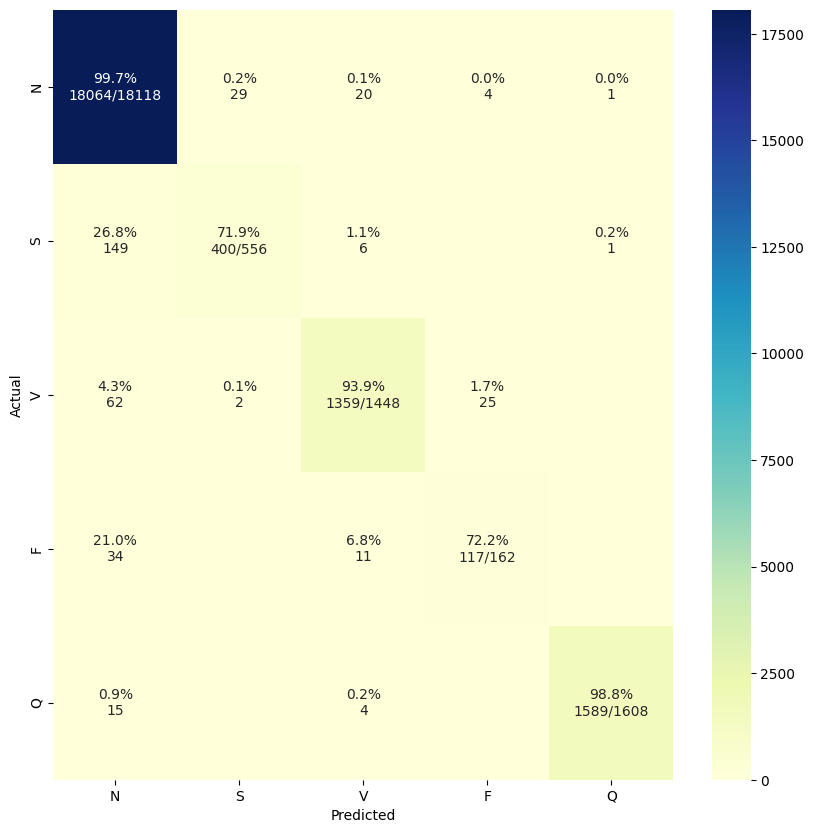

In [137]:
import seaborn as sns
def plot_cm(y_true, y_pred, figsize=(10,10)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    col = ['N','S','V','F','Q']
    cm = pd.DataFrame(cm, index=col, columns=col)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)
    
plot_cm(test_target, pred_idx_arr)